In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [35]:
processdata = pd.read_csv('processdata.csv', encoding='cp949', index_col = 0)

In [36]:
print(processdata.iloc[0,0])

0.143859649122807


In [37]:
print(processdata)

          기온(°C)  강수량(mm)   풍속(m/s)  풍향(16방위)  습도(%)  증기압(hPa)  현지기압(hPa)  \
0       0.143860      0.0  0.097345  0.888889   0.69  0.054974   0.725835   
1       0.138596      0.0  0.079646  0.750000   0.72  0.054974   0.731107   
2       0.149123      0.0  0.044248  0.944444   0.59  0.047120   0.732865   
3       0.156140      0.0  0.115044  1.000000   0.46  0.039267   0.736380   
4       0.147368      0.0  0.088496  1.000000   0.40  0.031414   0.729350   
...          ...      ...       ...       ...    ...       ...        ...   
114629  0.178947      0.0  0.000000  0.000000   0.87  0.078534   0.704745   
114630  0.170175      0.0  0.000000  0.000000   0.85  0.075916   0.694200   
114631  0.164912      0.0  0.194690  0.944444   0.87  0.075916   0.695958   
114632  0.178947      0.0  0.000000  0.000000   0.87  0.078534   0.701230   
114633  0.201754      0.0  0.000000  0.000000   0.83  0.083770   0.702988   

        적설(cm)  year  month       day      hour  
0          0.0   0.0    0

In [38]:
def split(orgdata,n):
    x_split = []
    y_split = []
    for i in range(len(orgdata)):
        x=orgdata.loc[i:i+n-1,:]
        if (i+n)<len(orgdata):
            x_split.append(x)
            y_split.append(orgdata.loc[i+n,:])
        else:
            break
    return np.array(x_split),np.array(y_split)

In [39]:
x,y = split(processdata,10)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=False)

In [41]:
model = tf.keras.models.load_model('model1.h5')

In [42]:
pre_y = model.predict(x_test)

1075/1075 [==============================] - 3s 2ms/step


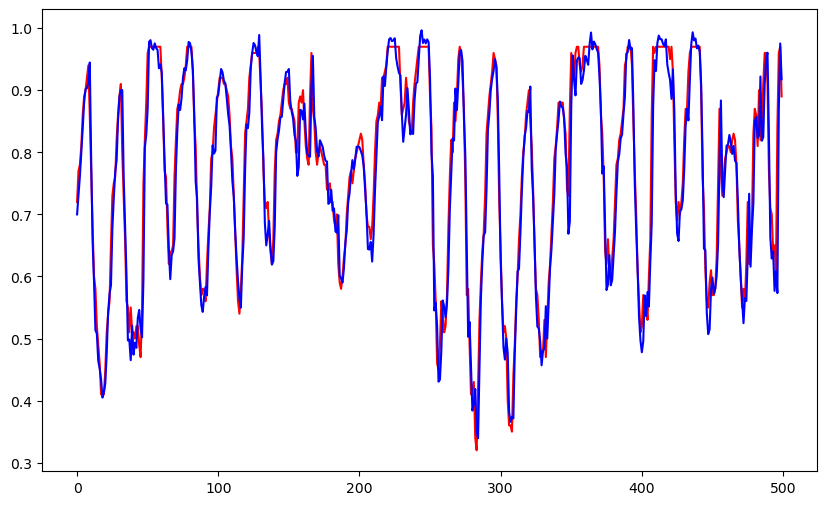

In [63]:
plt.figure(figsize=(10, 6), dpi = 100)
plt.plot(y_test[20000:20500,4], c='r')  #red
plt.plot(pre_y[20000:20500,4], c='b')  #blue
plt.savefig('res5.png')
plt.show()

In [86]:
model = tf.keras.models.load_model('model2.h5')

In [87]:
pre_y = model.predict(x_test)

1075/1075 [==============================] - 12s 11ms/step


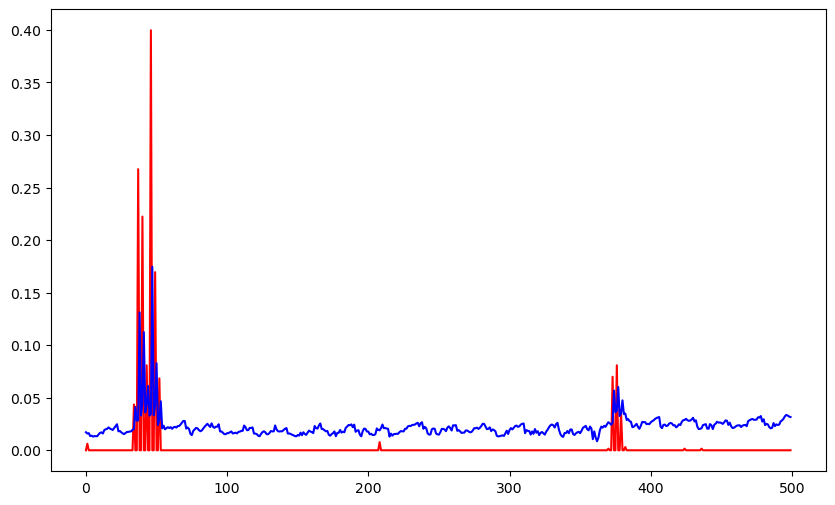

In [93]:
first=6300
count=500
plt.figure(figsize=(10, 6), dpi = 100)
plt.plot(y_test[first:first+count,1], c='r')  #red
plt.plot(pre_y[first:first+count], c='b')  #blue
plt.savefig('res2_1.png')
plt.show()